In [12]:
import pandas as pd
import numpy as np

In [13]:
# Generate random data
np.random.seed(0)
n = 100  # Number of students

df = pd.DataFrame({
    'Age': np.random.randint(18, 25, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Grade': np.random.randint(50, 100, n),
    'Absenteeism': np.random.randint(0, 10, n),
    'StudyHours': np.random.randint(1, 10, n)
})


In [22]:
missing_values = df.isnull().sum()
inconsistencies = (df['Grade'] < 0) | (df['Grade'] > 100)


0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Grade, Length: 100, dtype: bool

In [15]:
# Replace missing values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Replace inconsistencies with the median
df.loc[inconsistencies, 'Grade'] = df['Grade'].median()

In [21]:
numeric_variables = ['Grade', 'Absenteeism', 'StudyHours']
outliers = pd.DataFrame()
for var in numeric_variables:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[var] = (df[var] < lower_bound) | (df[var] > upper_bound)
       

In [25]:
for var in numeric_variables:
    # Remove outliers using winsorization
    lower_bound = df[var].quantile(0.05)
    upper_bound = df[var].quantile(0.95)
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])
    # Apply data transformation (log transformation) to 'Grade' variable
    if var == 'Grade':
        df[var] = np.log1p(df[var])

<Axes: >

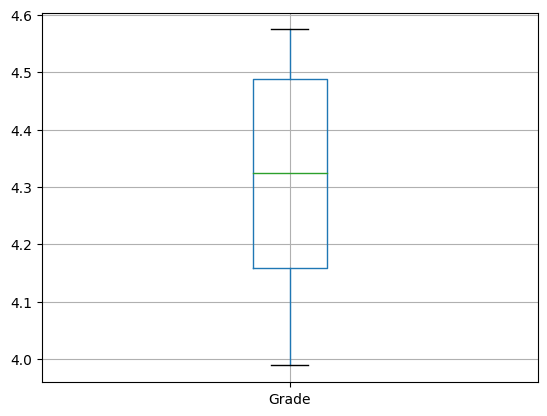

In [27]:
import matplotlib.pyplot as plt
df.boxplot(column=['Grade'])